In [54]:
import music21 as m21
import numpy as np
import pandas as pd
import os
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display
import seaborn as sns

import pdb

In [84]:
misaligned_files = [
'asap-Fugue_bwv_874-Bian',
'asap-Fugue_bwv_883-Herb',
'asap-Fugue_bwv_883-KaiR',
'asap-Fugue_bwv_883-Khma',
'asap-Fugue_bwv_885-SINK',
'asap-Prelude_bwv_885-SINK'  
]

In [92]:
chroma_metrics = 'eval/chroma'
ctc_chroma_metrics = 'eval/ctc-chroma'
nnls_chroma_metrics = 'eval/nnls'
hpcp_metrics = 'eval/hpcpgram'
cqt_metrics = 'eval/cqt'
dce_metrics = 'eval/dce'

In [93]:
chroma_metrics_df = pd.read_csv(os.path.join(chroma_metrics, 'metric_summary.csv'))
ctc_chroma_metrics_df = pd.read_csv(os.path.join(ctc_chroma_metrics, 'metric_summary.csv'))
nnls_chroma_metrics_df = pd.read_csv(os.path.join(nnls_chroma_metrics, 'metric_summary.csv'))
hpcp_metrics_df = pd.read_csv(os.path.join(hpcp_metrics, 'metric_summary.csv'))
cqt_metrics_df = pd.read_csv(os.path.join(cqt_metrics, 'metric_summary.csv'))
dce_metrics_df = pd.read_csv(os.path.join(dce_metrics, 'metric_summary.csv'))

chroma_metrics_df['algo'] = 'chroma'
ctc_chroma_metrics_df['algo'] = 'ctc_chroma'
nnls_chroma_metrics_df['algo'] = 'nnls'
hpcp_metrics_df['algo'] = 'hpcp'
cqt_metrics_df['algo'] = 'cqt'
dce_metrics_df['algo'] = 'dce'

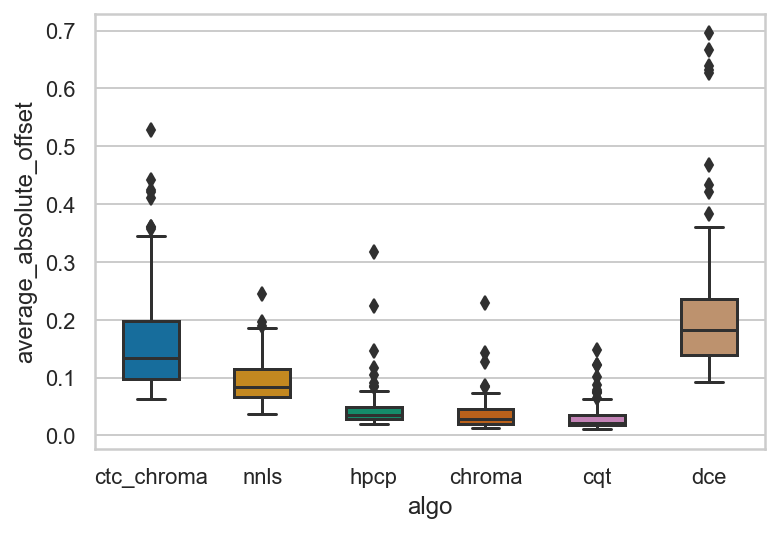

In [86]:
grouped_df = pd.concat([ctc_chroma_metrics_df, nnls_chroma_metrics_df, hpcp_metrics_df, 
                       chroma_metrics_df, cqt_metrics_df, dce_metrics_df], axis=0, ignore_index=True)

#remove the misaligned files
grouped_df = grouped_df[~grouped_df['file_id'].isin(misaligned_files)]

bplot = sns.boxplot(y='average_absolute_offset', x='algo', 
                 data=grouped_df, 
                 width=0.5,
                 palette="colorblind")

In [89]:
#to see why the chroma algo, for example, has so many outliers
#dce_metrics_df[dce_metrics_df['average_absolute_offset'] >= 0.25]

algo = 'dce'
grouped_df = grouped_df[grouped_df['algo'] == algo]
grouped_df[grouped_df['average_absolute_offset'] >= 0.25]

,file_id,misalignment_rate_50ms,misalignment_rate_250ms,misalignment_mean_50ms,misalignment_mean_250ms,variance_misaligned_50ms,variance_misaligned_250ms,1stquartile,median,3rdquartile,average_absolute_offset,algo
760,asap-Fugue_bwv_846-Shi0,83.355177,43.512451,0.427518,0.694342,0.356016,0.658529,0.083186,0.210221,0.476725,0.360526,dce
781,asap-Fugue_bwv_858-VuV0,92.537313,60.021322,0.749366,1.078202,1.927920,2.847517,0.148080,0.329428,0.629003,0.695303,dce
786,asap-Fugue_bwv_860-Tuan,82.330623,32.682927,0.299468,0.544890,0.203811,0.439349,0.072511,0.163195,0.299653,0.251106,dce
788,asap-Fugue_bwv_860-Zhan,84.607046,33.983740,0.320316,0.585181,0.222144,0.517331,0.082421,0.176215,0.335634,0.274889,dce
789,asap-Fugue_bwv_862-Song,87.472036,44.630872,0.371030,0.587442,0.231055,0.376346,0.102170,0.220426,0.412071,0.327600,dce
795,asap-Fugue_bwv_865-Zhan,85.870889,41.128705,0.363770,0.607489,0.321061,0.639454,0.090278,0.195572,0.374479,0.315963,dce
798,asap-Fugue_bwv_868-Gonz,87.085714,48.114286,0.406797,0.617384,0.353761,0.620339,0.116439,0.235455,0.477778,0.357524,dce
806,asap-Fugue_bwv_875-Ahfa,88.184080,51.492537,0.430250,0.636995,0.347688,0.575771,0.097917,0.261751,0.505382,0.382630,dce
807,asap-Fugue_bwv_875-CaoJ,85.820896,49.129353,0.541323,0.835811,0.645730,1.101583,0.104687,0.247309,0.574219,0.467890,dce
811,asap-Fugue_bwv_880-Wang,84.371808,34.525026,0.311460,0.562825,0.185691,0.399917,0.076433,0.174681,0.337609,0.266336,dce


In [40]:
sns.set_theme(style="whitegrid")

In [67]:
#here just change to the one we would like to evaluate right now
algo_name = 'chroma'
algo_results_df = chroma_metrics_df.fillna(0)

In [68]:
start_rate_50 = algo_results_df['misalignment_rate_50ms'].values.min()
end_rate_50 = algo_results_df['misalignment_rate_50ms'].values.max()

misalignment_rate_50_range = widgets.FloatRangeSlider(min = start_rate_50,
                                                 max = end_rate_50,
                                                 value = [start_rate_50 , end_rate_50], 
                                                 step=0.01, 
                                       description = "rate 50")

start_rate_250 = algo_results_df['misalignment_rate_250ms'].values.min()
end_rate_250 = algo_results_df['misalignment_rate_250ms'].values.max()

misalignment_rate_250_range = widgets.FloatRangeSlider(min = start_rate_250,
                                                  max = end_rate_250, 
                                                  value = [start_rate_250, end_rate_250], 
                                                  step=0.01,
                                        description = "rate 250")

start_mean_250 = algo_results_df['misalignment_mean_250ms'].values.min()
end_mean_250 = algo_results_df['misalignment_mean_250ms'].values.max()

misalignment_mean_250_range = widgets.FloatRangeSlider(min = start_mean_250, 
                                                  max = end_mean_250, 
                                                  value = [start_mean_250, end_mean_250],
                                                  step=0.01, 
                                        description = "mean 250")

In [69]:
#attach appropriate event handlers to the widgets (if needed) before passing them into interact

@widgets.interact_manual(misalignment_rate_50_range = misalignment_rate_50_range, 
                         misalignment_rate_250_range = misalignment_rate_250_range,
                         misalignment_mean_250_range = misalignment_mean_250_range)
    
def filter_results(misalignment_rate_50_range, misalignment_rate_250_range, misalignment_mean_250_range):
    
    filtered_df = algo_results_df[algo_results_df['misalignment_mean_250ms'] >= misalignment_mean_250_range[0]] 
    filtered_df = filtered_df[filtered_df['misalignment_mean_250ms'] <= misalignment_mean_250_range[1]]
                                  
    filtered_df = filtered_df[filtered_df['misalignment_rate_250ms'] >= misalignment_rate_250_range[0]]
    filtered_df = filtered_df[filtered_df['misalignment_rate_250ms'] <= misalignment_rate_250_range[1]]

    filtered_df = filtered_df[filtered_df['misalignment_rate_50ms'] >= misalignment_rate_50_range[0]]
    filtered_df = filtered_df[filtered_df['misalignment_rate_50ms'] <= misalignment_rate_50_range[1]]
    
    
    display(filtered_df)
    
    #algo_results_df[algo_results_df['misalignment_mean_
    
    #display(misalignment_mean_250_range)
    #display(misalignment_rate_250_range)
    #display(misalignment_rate_50_range)
    
    #show the filtered portion of the dataframe
    
    return

interactive(children=(FloatRangeSlider(value=(1.5918958031837915, 100.0), description='rate 50', min=1.5918958…

In [ ]:
#make a dropdown based on the resultant df

filtered_df.

In [ ]:
#Dropdowns --> to be based on a slider. 

#better add a metadata calculator for songs with the characteristics above
# avg time offset between midi score and performance midi.  (just calculate this as the slope)
# variance of the time rate. interpolate, and see if the interpolated function is linearly moving
# (we already have the high misalignment rate calculated)
# for the tempo: time/midi events [not so accurate because chords would increase the number of notes regardless
# the notes per a unit time better be grouped and we treat them as just one. 

## Display Alignment Rate per threshold

In [96]:
chroma_threshold_df = pd.read_csv(os.path.join(chroma_metrics, 'threshold_summary.csv'))
ctc_threshold_df = pd.read_csv(os.path.join(ctc_chroma_metrics, 'threshold_summary.csv'))
nnls_threshold_df = pd.read_csv(os.path.join(nnls_chroma_metrics, 'threshold_summary.csv'))
hpcp_threshold_df = pd.read_csv(os.path.join(hpcp_metrics, 'threshold_summary.csv'))
cqt_threshold_df = pd.read_csv(os.path.join(cqt_metrics, 'threshold_summary.csv'))
dce_threshold_df = pd.read_csv(os.path.join(dce_metrics, 'threshold_summary.csv'))

In [97]:
grouped_threshold_df = pd.concat([ctc_threshold_df, nnls_threshold_df, hpcp_threshold_df, 
                       chroma_threshold_df, cqt_threshold_df, dce_threshold_df], axis=0, ignore_index=True)

[Text(0, 0.5, 'Alignment Rate (AR)'),
 Text(0.5, 0, 'Misalignment Threshold (ms)')]

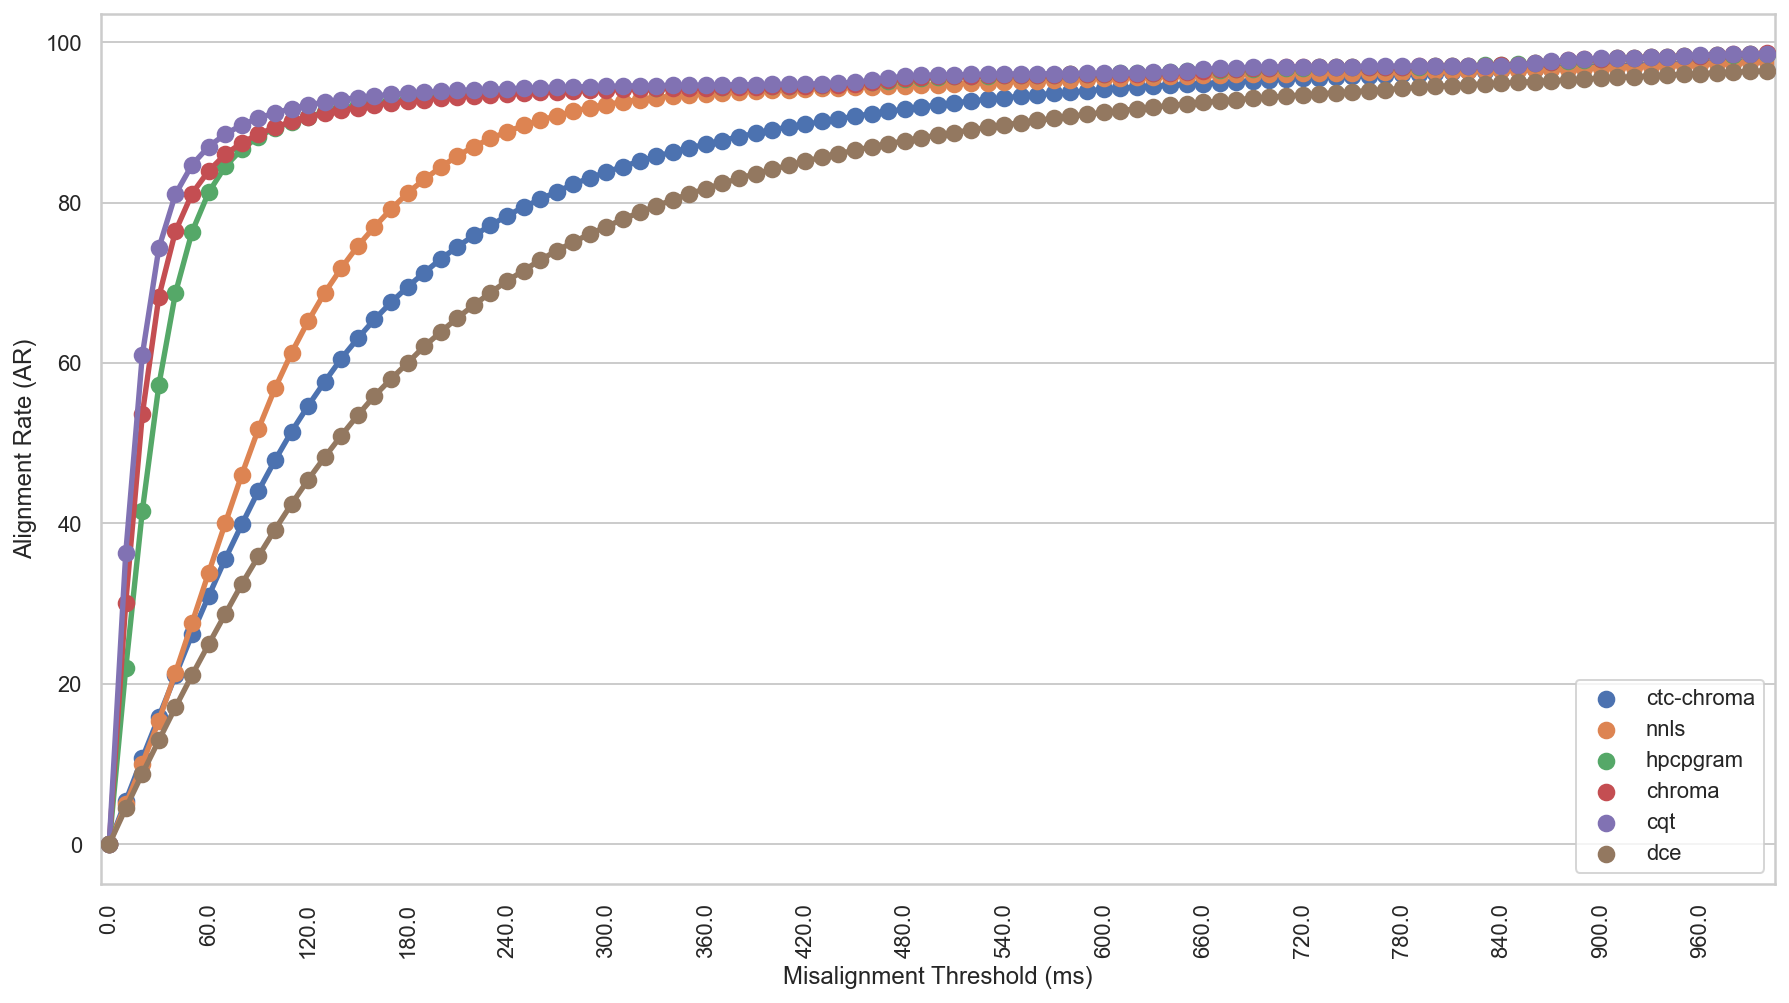

In [116]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MaxNLocator, FormatStrFormatter,
                               AutoMinorLocator)

plt.figure(figsize=(15,8))
plt.MaxNLocator(10)
plt.xticks(rotation = 90)
g = sns.pointplot(x="threshold", y="alignment_rate", hue="algo", data=grouped_threshold_df, scatter=False, legend=True)
g.legend_.set_title(None)
#g.xaxis.set_major_locator(tic.MaxNLocator(nbins=20))

g.xaxis.set_major_locator(MaxNLocator(19))
#g.xaxis.set_major_formatter(FormatStrFormatter('%d'))

# For the minor ticks, use no labels; default NullFormatter.
#ax.xaxis.set_minor_locator(MultipleLocator(5))


g.set(ylabel= "Alignment Rate (AR)", xlabel="Misalignment Threshold (ms)")


#ax = plt.axes()
#ax.xaxis.set_major_locator(plt.MaxNLocator(10))
